# Lending club case study

### Business Objectives:

**Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss.**

### Contributor(s) -  Subhabrata Ghosh / Mohammed Tarique Jamal

In [1]:
## Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing necessary libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Setup the figure aesthetics
sns.set(style='whitegrid')

In [4]:
## Setup a display options
## pd.set_option('display.max_rows', None)

## 01. Data Import

In [5]:
## Reading the load file
df_loan=pd.read_csv('loan.csv',engine='python')

In [6]:
## Basic data exploration
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
## shape - df_loan
df_loan.shape

(39717, 111)

In [8]:
## Check the columns - data types
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [9]:
## Check for null values
print(df_loan.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [10]:
## Check for the columns we have missing values
print(df_loan.columns[df_loan.isnull().sum()>0])

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', '

In [11]:
## Total columns we have missing values-
len(df_loan.columns[df_loan.isnull().sum()>0])

68

#### Analysis -  We have total 68 columns with missing values

## 02. Data Cleaning

In [12]:
## Just check the percentages of missing values
missing_columns = 100*round(df_loan.isnull().sum()/len(df_loan.index),2)
missing_columns

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### Analysis  - There are many columns with 100% missing data - Let's drop them straight away

In [13]:
full_missing_columns=missing_columns[missing_columns==100]
full_missing_columns

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [14]:
## Count total null columns
len(full_missing_columns)

54

In [15]:
## Dropping the null columns
df_loan=df_loan.drop(full_missing_columns.index, axis=1)

In [16]:
## Checking after dropping all the null columns
df_loan.shape

(39717, 57)

In [17]:
## Lets check the columns with partial null values

missing_columns = 100*round(df_loan.isnull().sum()/len(df_loan.index),2)
missing_columns[missing_columns!=0]

emp_title                  6.0
emp_length                 3.0
desc                      33.0
mths_since_last_delinq    65.0
mths_since_last_record    93.0
next_pymnt_d              97.0
pub_rec_bankruptcies       2.0
dtype: float64

#### Analysis -  We still have 3 columns with more than 50% of missing values - Let's drop them

In [18]:
## Dropping the null columns
df_loan=df_loan.drop(missing_columns[missing_columns>50].index, axis=1)

In [19]:
df_loan.shape

(39717, 54)

In [20]:
## Let's check further if we can identify anyother columns
missing_columns = 100*round(df_loan.isnull().sum()/len(df_loan.index),2)
missing_columns[missing_columns!=0]

emp_title                6.0
emp_length               3.0
desc                    33.0
pub_rec_bankruptcies     2.0
dtype: float64

#### Analysis - The desc column has higher null values and it appears that is not important for our analysis . Let's drop it

In [21]:
df_loan.drop('desc',axis=1,inplace=True)
df_loan.shape

(39717, 53)

In [22]:
## Check the current dataframe
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Analysis - It appears that several columns have the unique values - Lets check and drop them since those are not important for analysis

In [23]:
df_loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [24]:
## We can clearly see there are several columns with Unique values or single values.
## Let's check once more for the null values - in the column

missing_columns = 100*round(df_loan.isnull().sum()/len(df_loan.index),2)
missing_columns[missing_columns!=0]

emp_title               6.0
emp_length              3.0
pub_rec_bankruptcies    2.0
dtype: float64

#### It appears that all the null columns are categorical variable - Let's check one by one

In [25]:
df_loan.emp_title.value_counts()

US Army                  134
Bank of America          109
IBM                       66
AT&T                      59
Kaiser Permanente         56
                        ... 
jam distributing           1
Highlands Greenhouses      1
cardinal                   1
STG inc                    1
Rising Star Outreach       1
Name: emp_title, Length: 28820, dtype: int64

In [26]:
df_loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [27]:
df_loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

#### Analysis - We can clearly drop the rows - there we have null values

In [28]:
df_loan= df_loan[~(df_loan.pub_rec_bankruptcies.isnull())]
df_loan.shape

(39020, 53)

In [29]:
df_loan= df_loan[~(df_loan.emp_title.isnull())]
df_loan.shape

(36604, 53)

In [30]:
df_loan= df_loan[~(df_loan.emp_length.isnull())]
df_loan.shape

(36548, 53)

In [31]:
df_loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       49
issue_d                          52
total_acc                        79
last_credit_pull_d               96
last_pymnt_d                     97
int_rate                    

In [32]:
## Drop all the columns with unique values and not important for the analysis
drop = [c for c
        in list(df_loan)
        if len(df_loan[c].unique()) == len(df_loan.index)]

In [33]:
drop

['id', 'member_id', 'url']

In [34]:
df_loan.drop(drop,axis=1,inplace=True)

In [35]:
df_loan.shape

(36548, 50)

In [36]:
## Let's check further if we can identify anyother columns
missing_columns = 100*round(df_loan.isnull().sum()/len(df_loan.index),2)
missing_columns[missing_columns!=0]

Series([], dtype: float64)

In [37]:
## Drop all the columns with single values and not important for the analysis
drop = [c for c
        in list(df_loan)
        if len(df_loan[c].unique()) == 1]

In [38]:
drop

['pymnt_plan',
 'initial_list_status',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'delinq_amnt',
 'tax_liens']

In [39]:
## Lets drop the columns with single values and proceed with further analysis
df_loan.drop(drop,axis=1,inplace=True)

In [40]:
df_loan.shape

(36548, 43)

In [41]:
df_loan.nunique().sort_values()

collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
term                              2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
home_ownership                    4
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         38
addr_state                       49
issue_d                          52
total_acc                        79
last_credit_pull_d               96
last_pymnt_d                     97
int_rate                        334
earliest_cr_line                510
zip_code                        806
loan_amnt                       864
funded_amnt                    1025
out_prncp                      1064
out_prncp_inv                  1065
revol_util                  

In [42]:
## We still have 2 single values - Let's check them once again
df_loan.collections_12_mths_ex_med.value_counts()        

0.0    36546
Name: collections_12_mths_ex_med, dtype: int64

In [43]:
df_loan.chargeoff_within_12_mths.value_counts()

0.0    36546
Name: chargeoff_within_12_mths, dtype: int64

In [44]:
df_loan.shape

(36548, 43)

In [45]:
df_loan.columns[df_loan.isnull().sum()!=0]

Index(['title', 'revol_util', 'last_pymnt_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths'],
      dtype='object')

In [46]:
## It's clear that this two columns 'collections_12_mths_ex_med','chargeoff_within_12_mths' have the null and a single value
## Let's drop them 

df_loan.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths'],axis=1 ,inplace=True)
df_loan.shape

(36548, 41)

In [47]:
missing=df_loan.isnull().sum()
missing[missing!=0]

title            9
revol_util      46
last_pymnt_d    64
dtype: int64

In [48]:
## This three column above again gives very small perencetage of null values
## Tile - The loan title provided by the borrower
## revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
## last_pymnt_d - Last month payment was received
## All the columns seems to be important for analysis - Let's remove the rows with null values

df_loan=df_loan[~df_loan.title.isnull()]
df_loan=df_loan[~df_loan.revol_util.isnull()]
df_loan=df_loan[~df_loan.last_pymnt_d.isnull()]

In [49]:
## This should give us no missing values
missing=df_loan.isnull().sum()
missing[missing!=0]

Series([], dtype: int64)

In [50]:
## Check the shape of the data frame
df_loan.shape

(36433, 41)

In [51]:
df_loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

In [52]:
## Zip Code is irrelevant for our analysis
df_loan.drop('zip_code',axis=1,inplace=True)

In [53]:
df_loan.shape

(36433, 40)

In [54]:
## From the data dictionary provided it appears that the columns loan_amnt,funded_amnt ,funded_amnt_inv are similar
## Let's check the values
df_loan[['loan_amnt','funded_amnt','funded_amnt_inv']]

,loan_amnt,funded_amnt,funded_amnt_inv
1,2500,2500,2500.0
3,10000,10000,10000.0
4,3000,3000,3000.0
5,5000,5000,5000.0
6,7000,7000,7000.0
...,...,...,...
39551,12375,12375,1000.0
39562,4800,4800,1100.0
39623,9000,9000,700.0
39666,15450,15450,600.0


In [55]:
## We can safely drop the values to avoid duplicate colinearity
df_loan.drop(['funded_amnt','funded_amnt_inv'],axis=1 ,inplace=True)


In [56]:
df_loan.shape

(36433, 38)

#### Analysis -  We have 38 columns left after data cleaning

## 03. Data Standardization

In [57]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   term                     36433 non-null  object 
 2   int_rate                 36433 non-null  object 
 3   installment              36433 non-null  float64
 4   grade                    36433 non-null  object 
 5   sub_grade                36433 non-null  object 
 6   emp_title                36433 non-null  object 
 7   emp_length               36433 non-null  object 
 8   home_ownership           36433 non-null  object 
 9   annual_inc               36433 non-null  float64
 10  verification_status      36433 non-null  object 
 11  issue_d                  36433 non-null  object 
 12  loan_status              36433 non-null  object 
 13  purpose                  36433 non-null  object 
 14  title                 

In [58]:
## Let's have a look at Loan Staus
df_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [59]:
## Check the datetime columns from the data dictionary
## issue_d - The month which the loan was funded
## earliest_cr_line - The month the borrower's earliest reported credit line was opened
## last_pymnt_d - Last month payment was received
## last_credit_pull_d -The most recent month LC pulled credit for this loan
date_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']


In [60]:
df_loan[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 853.9+ KB


#### Converting the date to Mon-yy format - as provided in the data set . For reference - https://docs.python.org/3/library/datetime.html

In [61]:
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan.earliest_cr_line = pd.to_datetime(df_loan.earliest_cr_line, format='%b-%y')
df_loan.last_pymnt_d = pd.to_datetime(df_loan.last_pymnt_d, format='%b-%y')
df_loan.last_credit_pull_d = pd.to_datetime(df_loan.last_credit_pull_d, format='%b-%y')

In [62]:
df_loan[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [63]:
## Round the followning columns upto 2 decimal places for better analysis - Since all of them represents amount
## total_pymnt - Payments received to date for total amount funded
## total_rec_late_fee - Late fees received to date
## collection_recovery_fee - post charge off collection fee
df_loan.total_pymnt= round(df_loan.total_pymnt,2)
df_loan.total_rec_late_fee= round(df_loan.total_rec_late_fee,2)
df_loan.collection_recovery_fee= round(df_loan.collection_recovery_fee,2)

In [64]:
## Cross check
df_loan.collection_recovery_fee.value_counts().head()

0.00    33100
1.20       12
0.80       10
1.69       10
3.23       10
Name: collection_recovery_fee, dtype: int64

In [65]:
df_loan.total_rec_late_fee.value_counts().head()

0.00     34618
15.00      543
30.00      114
14.98       60
14.99       43
Name: total_rec_late_fee, dtype: int64

In [66]:
df_loan.collection_recovery_fee.value_counts().head()

0.00    33100
1.20       12
0.80       10
1.69       10
3.23       10
Name: collection_recovery_fee, dtype: int64

In [67]:
## There are few percentage columns like - 'int_rate','revol_util' - Let's fix them
df_loan['int_rate'] = df_loan['int_rate'].str.strip('%').astype('float')
df_loan['revol_util'] = df_loan['revol_util'].str.strip('%').astype('float')

In [68]:
df_loan.int_rate.describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

In [69]:
df_loan.revol_util.describe()

count    36433.000000
mean        49.276251
std         28.191811
min          0.000000
25%         26.100000
50%         49.900000
75%         72.700000
max         99.900000
Name: revol_util, dtype: float64

In [70]:
## Check the emp_length column
df_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [71]:
## Convert it to integer 
import re
df_loan.emp_length = df_loan.emp_length.apply(lambda x: re.findall('\d+', str(x))[0])
df_loan.emp_length = df_loan.emp_length.apply(lambda x: pd.to_numeric(x))


In [72]:
df_loan.emp_length.value_counts()

10    8407
1     7078
2     4178
3     3914
4     3297
5     3129
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [73]:
df_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [74]:
## Define a function to plot status across the categorical variable
def categorical_plot(cat_var):
    sns.barplot(x=cat_var, y='is_loan_default', data=df_loan)
    plt.ylabel("charged off")
    plt.show()

In [75]:
## Define a function to put label on the bar chart
def autolabel(ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    # access the bar attributes to place the text in the appropriate location
    for bar in ax.patches:
      yval = bar.get_height()
      plt.text(bar.get_x(), yval + .005, yval)

In [76]:
def boxplot(col,df):
    sns.boxplot(x=df[col], y=df['loan_status'], data=df)


## 04. Data Analysis

In [77]:
## Check the shape of the loans
df_loan.shape

(36433, 38)

In [78]:
## Removing the 'Current' from the data set
df_loan=df_loan[df_loan.loan_status!='Current']
df_loan.shape

(35367, 38)

In [79]:

df_loan['is_loan_default'] = df_loan.loan_status.apply(lambda x : 1 if x=='Charged Off' else 0)
df_loan['is_loan_default'] = df_loan['is_loan_default'].apply(lambda x: pd.to_numeric(x))
df_loan.is_loan_default.value_counts()

0    30424
1     4943
Name: is_loan_default, dtype: int64

In [80]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                35367 non-null  int64         
 1   term                     35367 non-null  object        
 2   int_rate                 35367 non-null  float64       
 3   installment              35367 non-null  float64       
 4   grade                    35367 non-null  object        
 5   sub_grade                35367 non-null  object        
 6   emp_title                35367 non-null  object        
 7   emp_length               35367 non-null  int64         
 8   home_ownership           35367 non-null  object        
 9   annual_inc               35367 non-null  float64       
 10  verification_status      35367 non-null  object        
 11  issue_d                  35367 non-null  datetime64[ns]
 12  loan_status              35367 n

## 04.01 Univariate Analysis

#### Analysis: loan_status - Current status of the loan

In [81]:
default_percentage=round(np.mean(df_loan.is_loan_default),2)*100
default_percentage

14.000000000000002

**Observation - The overall default rate is about 14%.**

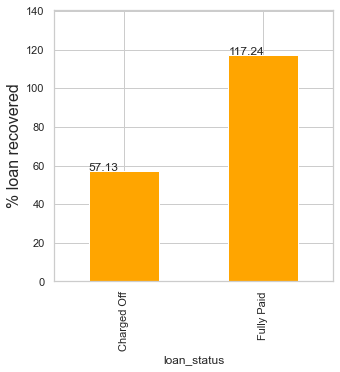

In [82]:
## Percentage of loan recovered amount - by loan_status
plt.figure(figsize=(5,5))
ax = round((df_loan.groupby('loan_status').total_pymnt.sum() * 100 / df_loan.groupby('loan_status').loan_amnt.sum()),2).plot.bar(color=['orange'])
ax.set_ylabel('% loan recovered', fontsize=16)
autolabel(ax)
plt.margins(0.2, 0.2)

**Observation** - <p>About 57.13% of the loan amount has been recovered , in the case of default.Hence, Lending club makes the loss there.</p>

#### Analysis - Grade - LC assigned loan grade

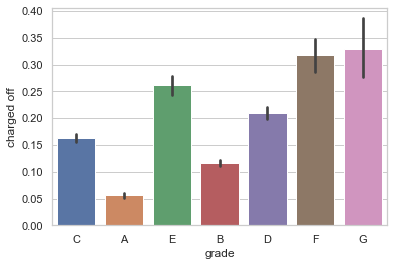

In [83]:
# plotting default rates across grade of the loan
categorical_plot('grade')

**Observation** - <p>Grade A,B,C have lesser default rate than Grade E,F,G . So the grading system is working fine.For more details , please have a look https://www.lendingclub.com/investing/investor-education/what-is-a-lendingclub-note</p>

  

#### Analysis- sub_grade - LC assigned loan subgrade

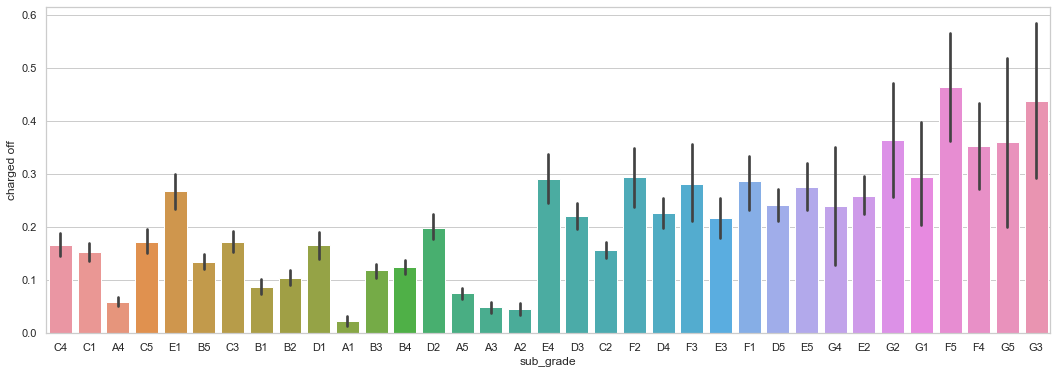

In [84]:
# plotting default rates across grade of the loan
plt.figure(figsize=(18, 6))
categorical_plot('sub_grade')

**observation** - <p>As expected the default rate is better in A1 than A2 and A3. So the Sub grading system in a particular grade in lending club is working fine in this scenario.</p> <p> For more details , please have a look https://www.lendingclub.com/investing/investor-education/what-is-a-lendingclub-note </p>

#### Analysis - term - The number of payments on the loan. Values are in months and can be either 36 or 60.

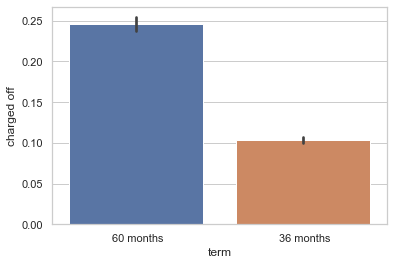

In [85]:
categorical_plot('term')

**Observation** -<p>The loan approved for the higher term is riskier than the loan apporved for the lower term</p>

#### Analysis purpose - A category provided by the borrower for the loan request. 

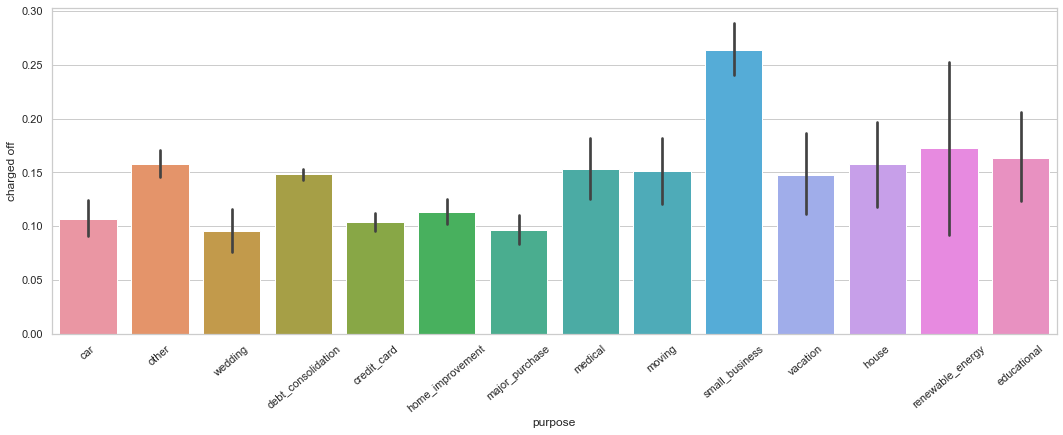

In [86]:
plt.figure(figsize=(18, 6))
plt.xticks(rotation=40) 
categorical_plot('purpose')


**Observation**
<p> Top 3 defaulters are - small_business , renewable_energy , educatuional<p>

#### Analysis:  pub_rec_bankruptcies - Number of public record bankruptcies

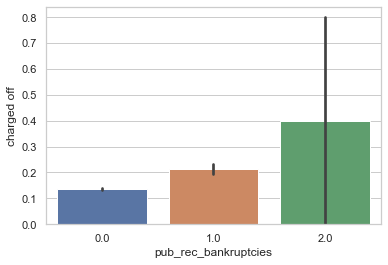

In [87]:
categorical_plot('pub_rec_bankruptcies')


**Observation** <p>Larget number of defaulters have been filed **Bankruptcy**.</p>

#### Analysis: verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified

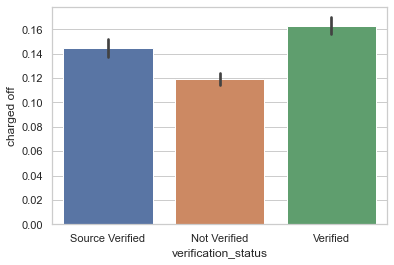

In [88]:
categorical_plot('verification_status')

**Observation**
<p> The verification process is not working well in Lending club - as we have seen higher default rate for the verified loans</p>

#### Analysis: emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

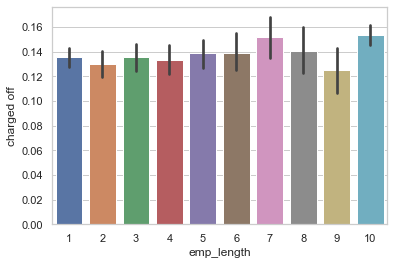

In [89]:
categorical_plot('emp_length')

In [90]:
# binning the variable
def emp_length(x):
    n=int(x)
    if n <= 1:
        return '<=1 years'
    elif n > 1 and n <=3:
        return '1-3 years'
    elif n > 3 and n <=7:
        return '3-7 years'
    else:
        return '7-10+ years'

df_loan['emp_length_category'] = df_loan['emp_length'].apply(lambda x: emp_length(x))

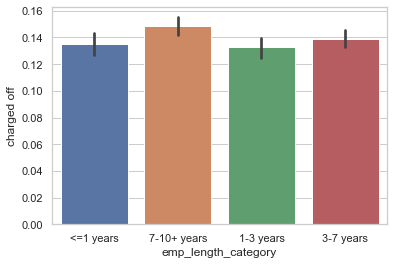

In [91]:
categorical_plot('emp_length_category')

**Observation**
<p> The employment length is not a predictor for the default . However people with 7-10+ years experience has little higher default rate than others </p>

#### Analysis - emp_title - The job title supplied by the Borrower when applying for the loan.  Employer Title replaces Employer Name for all loans listed after 9/23/2013


In [92]:
top5_emp_title = df_loan[df_loan.is_loan_default==1].emp_title.value_counts(normalize=False).head(5)
top5_emp_title

Bank of America    20
US Army            17
Walmart            13
AT&T               12
UPS                11
Name: emp_title, dtype: int64

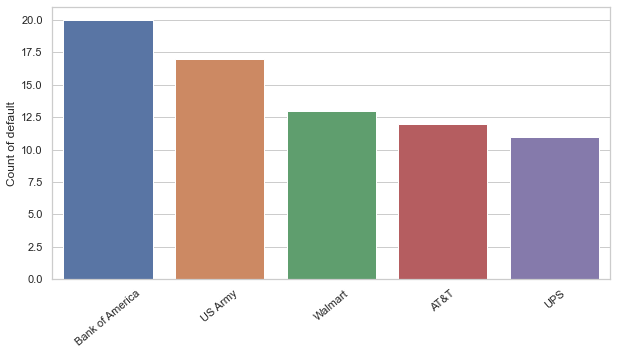

In [93]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=40) 
a=sns.barplot(x=top5_emp_title.index, y=top5_emp_title.values)
a.set_ylabel('Count of default')
plt.show()

**Observation** - Max of defaulters are employed by Bank of America , US Army followed by Walmart

#### Analysis - addr_state - The state provided by the borrower in the loan application

In [94]:
top5_addr_state = df_loan[df_loan.is_loan_default==1].addr_state.value_counts(normalize=False).head(5)
top5_addr_state

CA    976
NY    438
FL    437
TX    273
NJ    256
Name: addr_state, dtype: int64

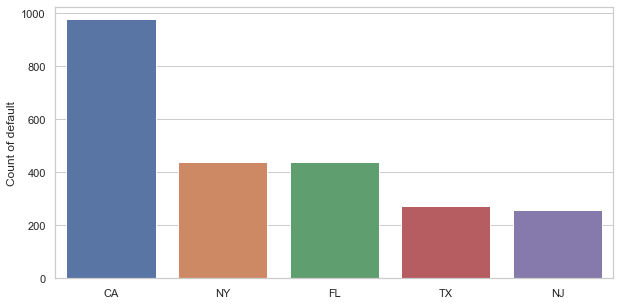

In [95]:
plt.figure(figsize=(10,5))
#plt.xticks(rotation=40) 
a=sns.barplot(x=top5_addr_state.index, y=top5_addr_state.values)
a.set_ylabel('Count of default')
plt.show()

**Observation** - Most of the defaulters live in California , followed by New york and Florida

#### Analysis: home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

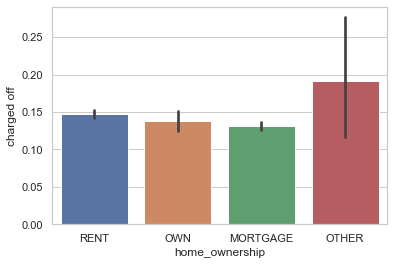

In [96]:
categorical_plot('home_ownership')

**Observation** - Home ownership is not a great predictor for defaulter

#### Analysis : issue_d - The month which the loan was funded

In [97]:
df_loan['issue_d_year']=df_loan.issue_d.dt.year
df_loan.groupby('issue_d_year')['issue_d_year'].count()

issue_d_year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: issue_d_year, dtype: int64

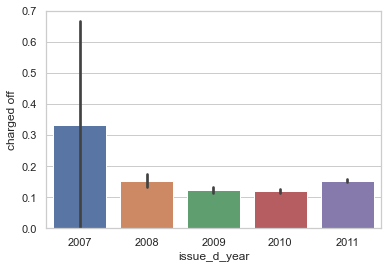

In [98]:
categorical_plot('issue_d_year')

In [99]:
df_loan['issue_d_month']=df_loan.issue_d.dt.month
df_loan.groupby('issue_d_month')['issue_d_month'].count()

issue_d_month
1     2048
2     2020
3     2395
4     2669
5     2745
6     2977
7     3115
8     3188
9     3276
10    3436
11    3678
12    3820
Name: issue_d_month, dtype: int64

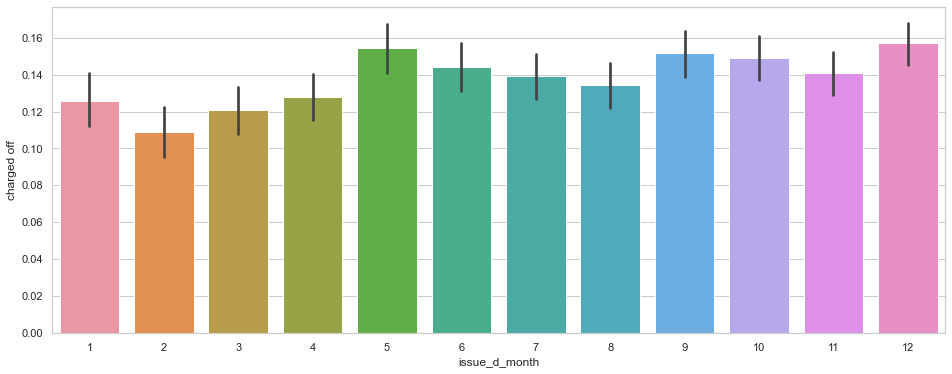

In [100]:
plt.figure(figsize=(16, 6))
categorical_plot('issue_d_month')

**Observation** <p>The default loans were decreasing from **2008** to **2010**. However there is an increase in the year **2011**</p>

#### Analysis - loan_amnt- The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [101]:
df_loan['loan_amnt'].describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [102]:
## We have median of 10000 - Let's bin it 
df_loan['loan_amnt_bin'] = pd.cut(df_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

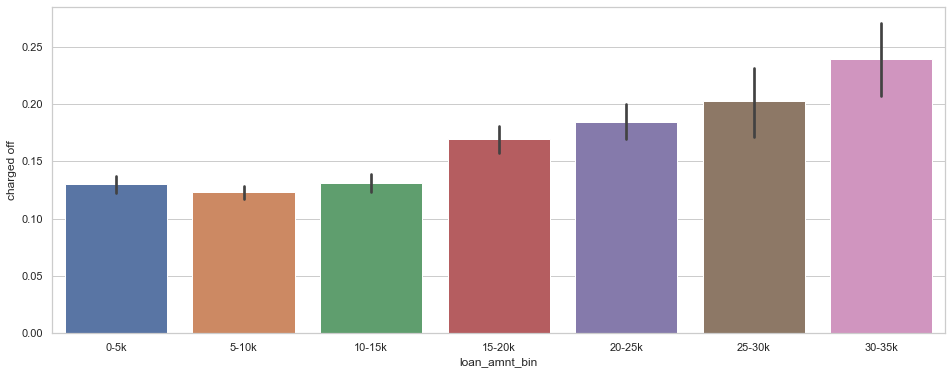

In [103]:
plt.figure(figsize=(16, 6))
categorical_plot('loan_amnt_bin')

**Observation** <p> Higher loan amount, Higher the default rate</p>

#### int_rate - Interest Rate on the loan.

In [104]:
df_loan['int_rate'].describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

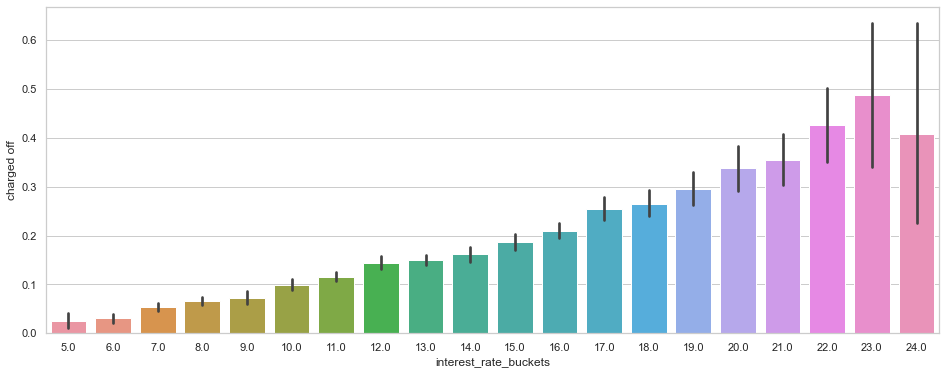

In [105]:
## The average interest rate is 11.83%
df_loan['interest_rate_buckets'] = round(df_loan['int_rate'])
plt.figure(figsize=(16, 6))
categorical_plot('interest_rate_buckets')

**Observation** <p> The chances of loan default increases with higher interest rate </p>

#### Analysis: Installment -  he monthly payment owed by the borrower if the loan originates.

In [106]:
df_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


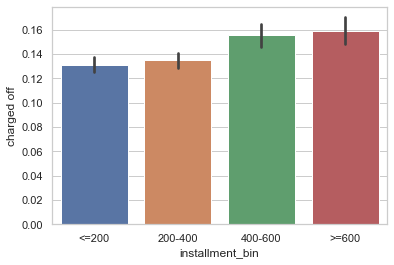

In [107]:
# installment
def installment(n):
    if n <= 200:
        return '<=200'
    elif n > 200 and n <=400:
        return '200-400'
    elif n > 400 and n <=600:
        return '400-600'
    else:
        return '>=600'
    
df_loan['installment_bin'] = df_loan['installment'].apply(lambda x: installment(x))
categorical_plot('installment_bin')

**Observation** 
<p>Loans Charged Off have high installment on average </p>

#### Analysis: annual_inc - The self-reported annual income provided by the borrower during registration.

In [108]:
df_loan['annual_inc'].describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [109]:
## We have annual income ranging from the 4000 to 6000000 with a median value 60000 
## We have median of 60000 
Q1 = df_loan.annual_inc.quantile(0.25)
Q3 = df_loan.annual_inc.quantile(0.75)
IQR = Q3 - Q1
IQR

41000.0

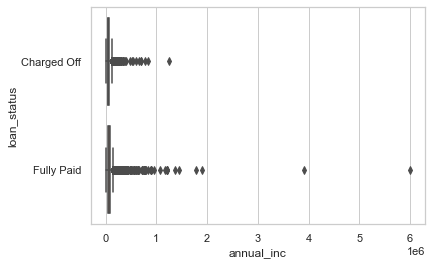

In [110]:
boxplot('annual_inc',df_loan)

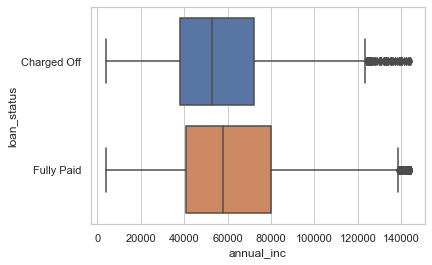

In [111]:
## Let's remove the outliers
df = df_loan[~((df_loan.annual_inc < (Q1 - 1.5 * IQR)) |(df_loan.annual_inc > (Q3 + 1.5 * IQR)))]
boxplot('annual_inc',df)

In [112]:
df['annual_inc'].describe()

count     33747.000000
mean      61719.146652
std       27763.774295
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78281.170000
max      144000.000000
Name: annual_inc, dtype: float64

In [113]:
# annual income
def annual_income(n):
    if n <= 20000:
        return '<=20k'
    elif n > 20000 and n <=40000:
        return '20k-40k'
    elif n > 60000 and n <=80000:
        return '60k-80k'
    else:
        return '>=80k'
df_loan['annual_inc_bin'] = df_loan['annual_inc'].apply(lambda x: annual_income(x))

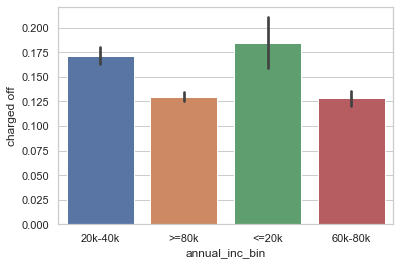

In [114]:
sns.barplot(x='annual_inc_bin', y='is_loan_default', data=df_loan)
plt.ylabel("charged off")
plt.show()

**Observation** <p>Default loan is higher for the lower annual incomes.</p>

#### Analysis: dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

df_loan.dti.describe()

In [115]:
## The Dti range from 0 to 30 and with the median 13.5 and mean 13.4. There is no outliers. 
## Let's bin it in the interval of 5
df_loan['dti_bin'] = pd.cut(df_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

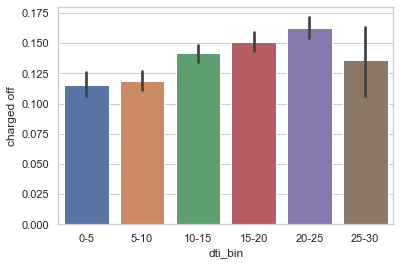

In [116]:
categorical_plot('dti_bin')

**Observation** - <p>As expected , Defaulter rate increases with the higher dti </p>

#### Analysis - delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [117]:
df_loan.delinq_2yrs.value_counts()

0     31533
1      2939
2       614
3       189
4        53
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

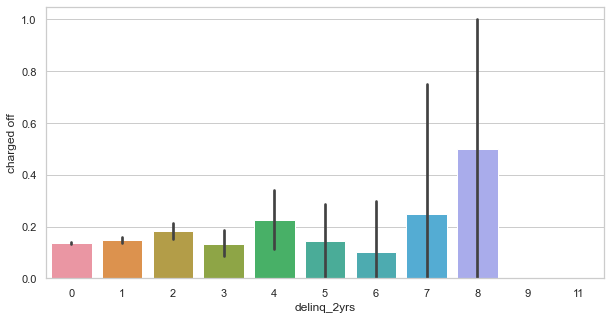

In [118]:
plt.figure(figsize=(10,5))
categorical_plot('delinq_2yrs')

**Observation** <p> Higher chances of defaulter with higher value of delinq_2yrs (>=1)

#### Analysis:  total_acc - The total number of credit lines currently in the borrower's credit file.

In [119]:
df=df_loan.groupby('loan_status')['total_acc'].describe()
df

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,21.730123,11.438113,2.0,13.0,20.0,29.0,70.0
Fully Paid,30424.0,22.287043,11.395624,3.0,14.0,21.0,29.0,90.0


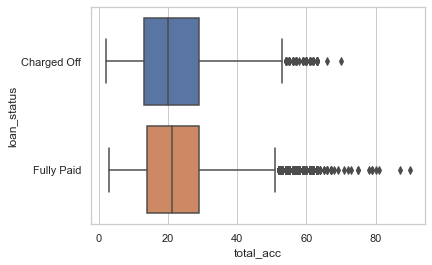

In [120]:
boxplot('total_acc',df_loan)

**Observation** <p>This value does not differ much in the Fully paid and Charged off loans. </p>

#### Analysis: revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [121]:
df=df_loan.groupby('loan_status')['revol_util'].describe()
df

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,56.157504,27.649831,0.0,35.45,59.3,79.2,99.9
Fully Paid,30424.0,47.998719,28.156580,0.0,24.50,48.2,71.2,99.9


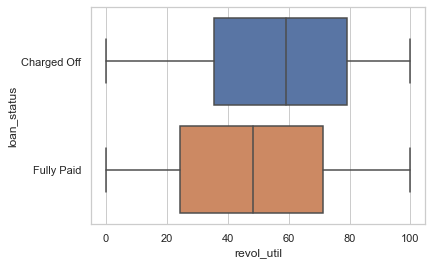

In [122]:
boxplot('revol_util',df_loan)

#### Analysis : revol_bal - Total credit revolving balance

In [123]:
df=df_loan.groupby('loan_status')['revol_bal'].describe()
df

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13680.089824,14768.969553,0.0,4246.5,9562.0,17809.0,147365.0
Fully Paid,30424.0,13316.918847,15820.937992,0.0,3711.0,8833.0,16941.0,149588.0


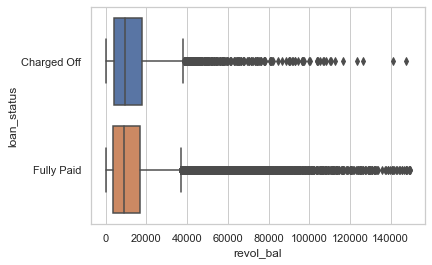

In [124]:
boxplot('revol_bal',df_loan)

**Observation** <p>This value does not differ much in the Fully paid and Charged off loans. </p>

#### Analysis - pub_rec - Number of derogatory public records.

In [125]:
df_loan.pub_rec.value_counts()

0    33516
1     1798
2       44
3        7
4        2
Name: pub_rec, dtype: int64

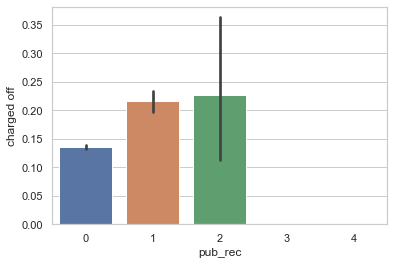

In [126]:
categorical_plot('pub_rec')

**Observation** <p>The chances of defaulter is higher in case there is a derogatory public record</p>

#### Analysis: open_acc : The number of open credit lines in the borrower's credit file.

In [127]:
df_loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


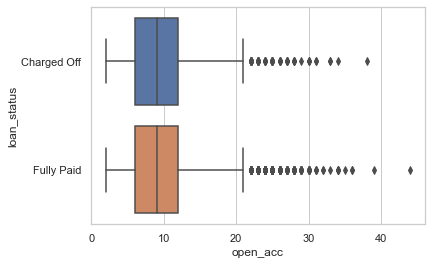

In [128]:
boxplot('open_acc',df_loan)

**Observation** <p>No significant difference between - Fully paid and charged off . </p>

#### Analysis - last_pymnt_amnt - Last total payment amount received


In [129]:
df_loan.groupby('loan_status')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,331.126913,526.178060,0.01,119.3750,244.090,409.4500,12818.38
Fully Paid,30424.0,3216.920187,4749.376481,0.16,263.6625,912.985,4382.0575,36115.20


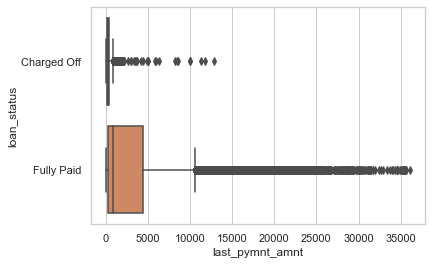

In [130]:
boxplot('last_pymnt_amnt',df_loan)

**Observation** - As expected the last paid amount is significantly lower in case of charged off than fully paid

#### We are dropping the following columns as they are not important for our analysis - as they are customer behaviour variables and are not available at the time of loan approval . So, They are not important for our analysis 

In [131]:
df_loan=df_loan.drop(['earliest_cr_line','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_credit_pull_d'       
 ],axis=1)

In [132]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   loan_amnt              35367 non-null  int64         
 1   term                   35367 non-null  object        
 2   int_rate               35367 non-null  float64       
 3   installment            35367 non-null  float64       
 4   grade                  35367 non-null  object        
 5   sub_grade              35367 non-null  object        
 6   emp_title              35367 non-null  object        
 7   emp_length             35367 non-null  int64         
 8   home_ownership         35367 non-null  object        
 9   annual_inc             35367 non-null  float64       
 10  verification_status    35367 non-null  object        
 11  issue_d                35367 non-null  datetime64[ns]
 12  loan_status            35367 non-null  object        
 13  p

## 04.02 - Segmented Univariate Analysis

**In credit industry the purpose of the loan is used by the lender to analysis the risk of the loan** 

According to the wikipedia - https://en.wikipedia.org/wiki/Loan_purpose

Loan purpose is a term in United States mortgage industry to show the underlying reason an applicant is seeking a loan. The purpose of the loan is used by the lender to make decisions on the risk and may even impact the interest rate that is offered. For example, if an applicant is refinancing a mortgage after having taken some cash out, the lender might consider that an increase in risk and increase the interest rate that is offered or add additional conditions. Loan purpose is important to the process of obtaining mortgages or business loans that are connected with specific types of business activities.

**The purpose of loans are in different nature from each other. Let's analysis the most loan taken for top 4 purposes with some important variables.**

## Identify top 4 types of loans based on purposes 

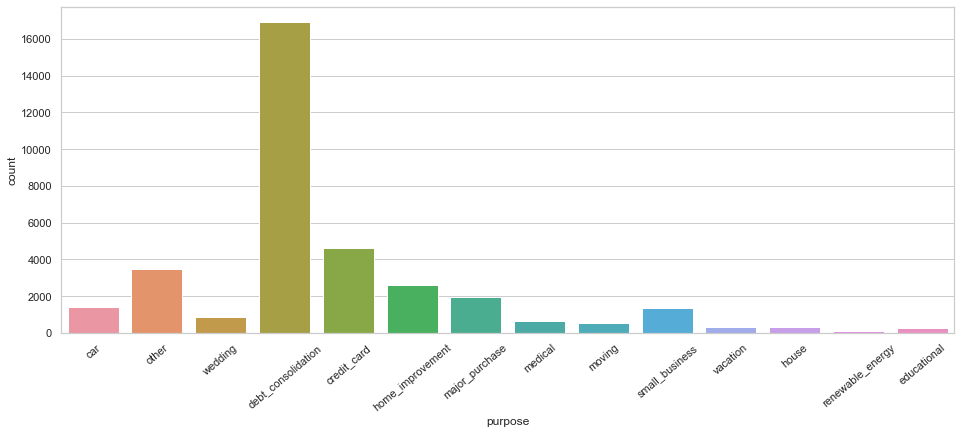

In [133]:
##Let's have a look at the number of loans taken for different purposes
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=df_loan)
plt.show()

#### Obseravation  -
<p>
    <b> The top 4 loans are -</b>
       <ul>
           <li> Debt consolidation </li>
           <li> Credit card </li>
           <li> Home improvement </li>
           <li> Major purchase </li>
       </ul>   
    <p>

In [134]:
## Let's filter out the loans for this top 4 purposes for the further analysis
top_purposes = ['debt_consolidation','credit_card','home_improvement','major_purchase']
df=df_loan[df_loan.purpose.isin(top_purposes)]
df.shape

(26124, 34)

In [135]:
defaulter=df[df.is_loan_default==1]
defaulter.purpose.value_counts()

debt_consolidation    2509
credit_card            479
home_improvement       296
major_purchase         190
Name: purpose, dtype: int64

#### Analysis - Top 4 loans based on purposes

In [136]:
## Let's check the count for each loan types
df.purpose.value_counts()

debt_consolidation    16911
credit_card            4626
home_improvement       2614
major_purchase         1973
Name: purpose, dtype: int64

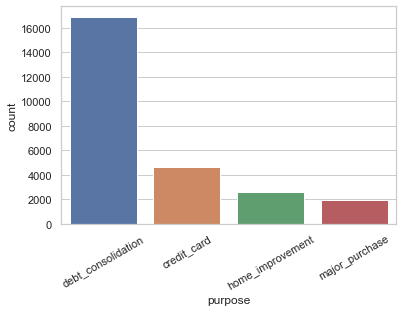

In [137]:
## Let's draw a plot to compare all the loans
sns.countplot(x=df.purpose)
plt.xticks(rotation=30)
plt.show()

**Observation** 
<p> The number of loans taken for debt consolidation is greater than the rest of the three combined.<p>

In [138]:
## Define a function to plot status across the categorical variable - and segmented by purpose
def categorical_segmented_plot(cat_var,df):
    sns.barplot(x=cat_var, y='is_loan_default',hue='purpose' ,data=df)
    plt.ylabel("charged off")
   

## Analysis - 
<p>Default loan analysis based on two variables - purpose (constant) and other categorical variable</p>

#### variable - term

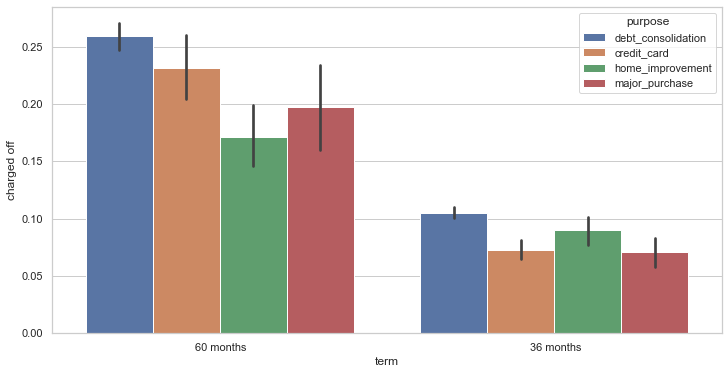

In [139]:
plt.figure(figsize=(12,6))
categorical_segmented_plot('term',df)
plt.show()

#### variable - grade 

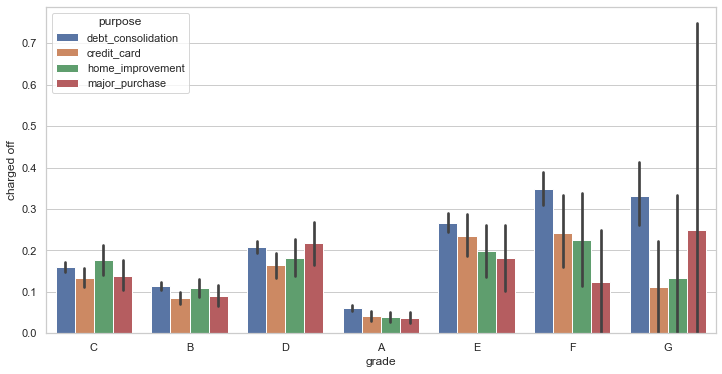

In [140]:
plt.figure(figsize=(12,6))
categorical_segmented_plot('grade',df)
plt.show()

#### variable - home_ownership


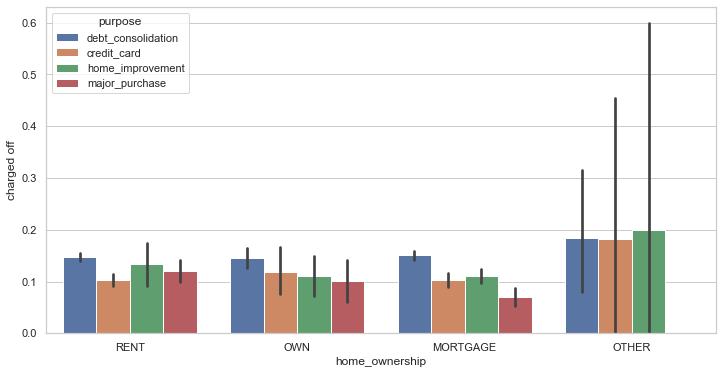

In [141]:
plt.figure(figsize=(12,6))
categorical_segmented_plot('home_ownership',df)
plt.show()

#### variable:  issue_d_year - This is a derived variable - the year when the loan was issued

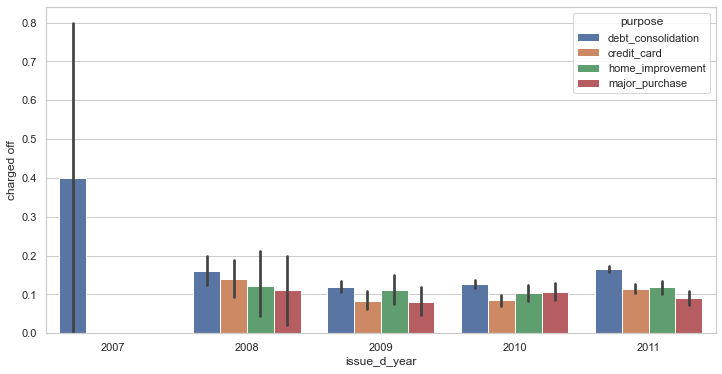

In [142]:
plt.figure(figsize=(12,6))
categorical_segmented_plot('issue_d_year',df)
plt.show()

In [143]:
x=defaulter.groupby(['issue_d_year','purpose'])['is_loan_default'].count()
x

issue_d_year  purpose           
2007          debt_consolidation       2
2008          credit_card             28
              debt_consolidation      62
              home_improvement         8
              major_purchase           5
2009          credit_card             45
              debt_consolidation     228
              home_improvement        35
              major_purchase          17
2010          credit_card            114
              debt_consolidation     644
              home_improvement        83
              major_purchase          81
2011          credit_card            292
              debt_consolidation    1573
              home_improvement       170
              major_purchase          87
Name: is_loan_default, dtype: int64

#### variable - emp_length_category - derived variable from emp_length

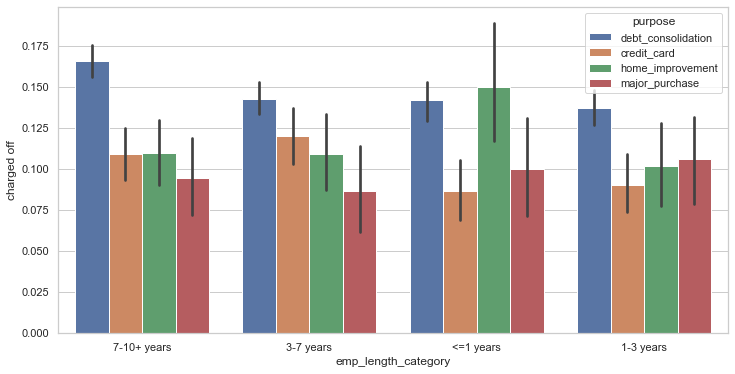

In [144]:
plt.figure(figsize=(12,6))
categorical_segmented_plot('emp_length_category',df)
plt.show()

#### variable - loan_amnt_bin - derived variable from loan_amnt - to classify the loan amount in groups

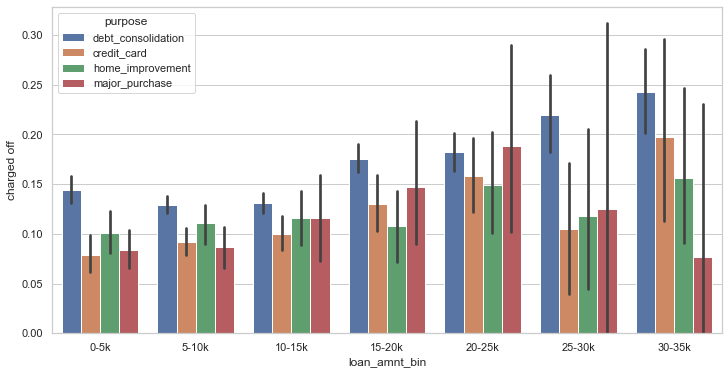

In [145]:
plt.figure(figsize=(12,6))
categorical_segmented_plot('loan_amnt_bin',df)
plt.show()

#### variable - interest_rate_buckets - derived variable from int_rate 

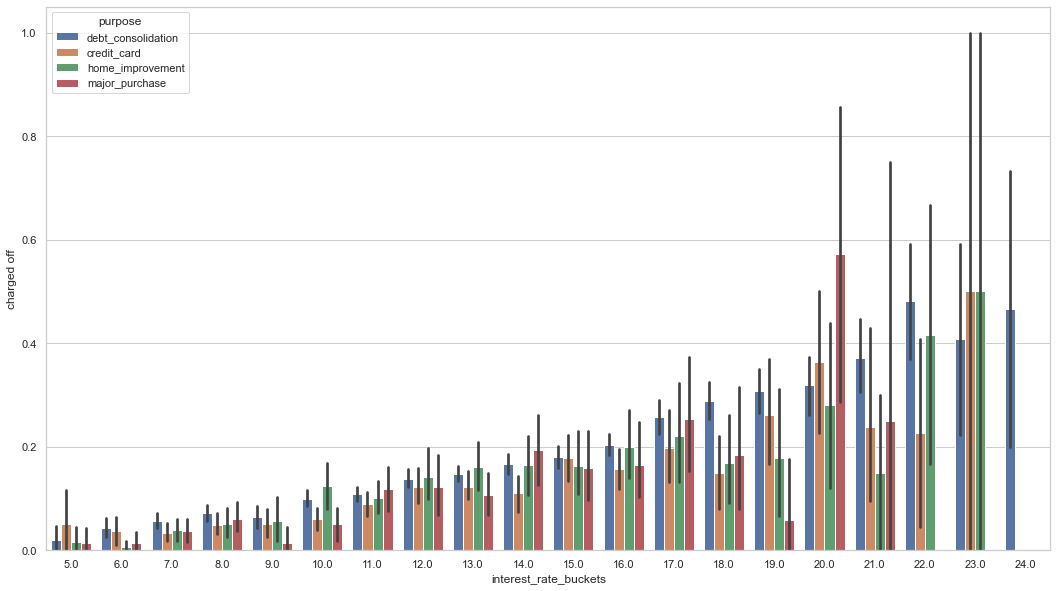

In [146]:
plt.figure(figsize=(18,10))
categorical_segmented_plot('interest_rate_buckets',df)
plt.show()

#### variable - installment_bin - derived from installment

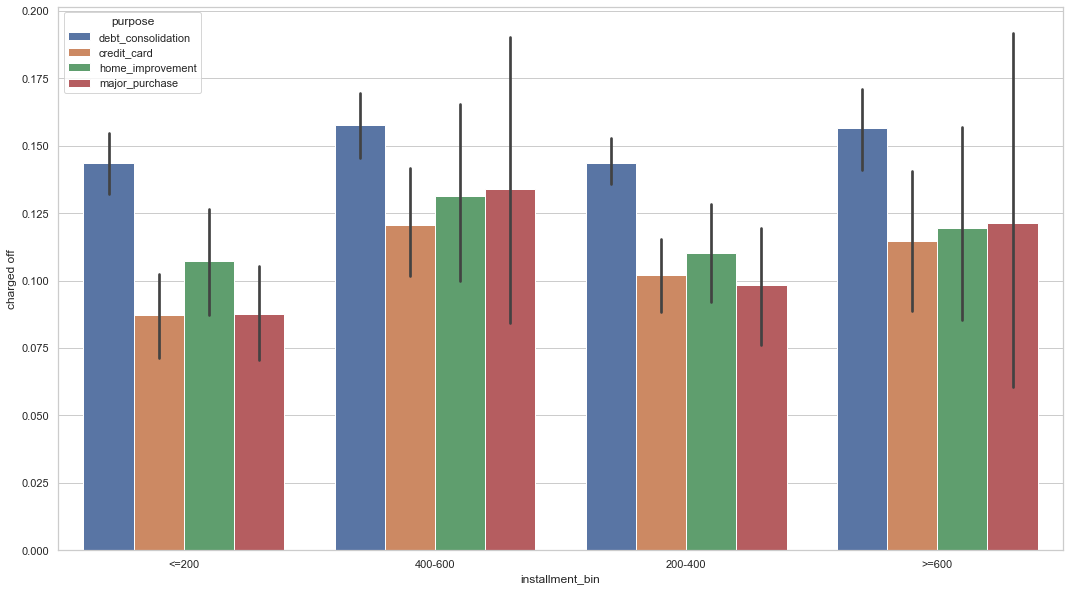

In [147]:
plt.figure(figsize=(18,10))
categorical_segmented_plot('installment_bin',df)
plt.show()

#### variable - dti_bin - this is a derived variable from dti

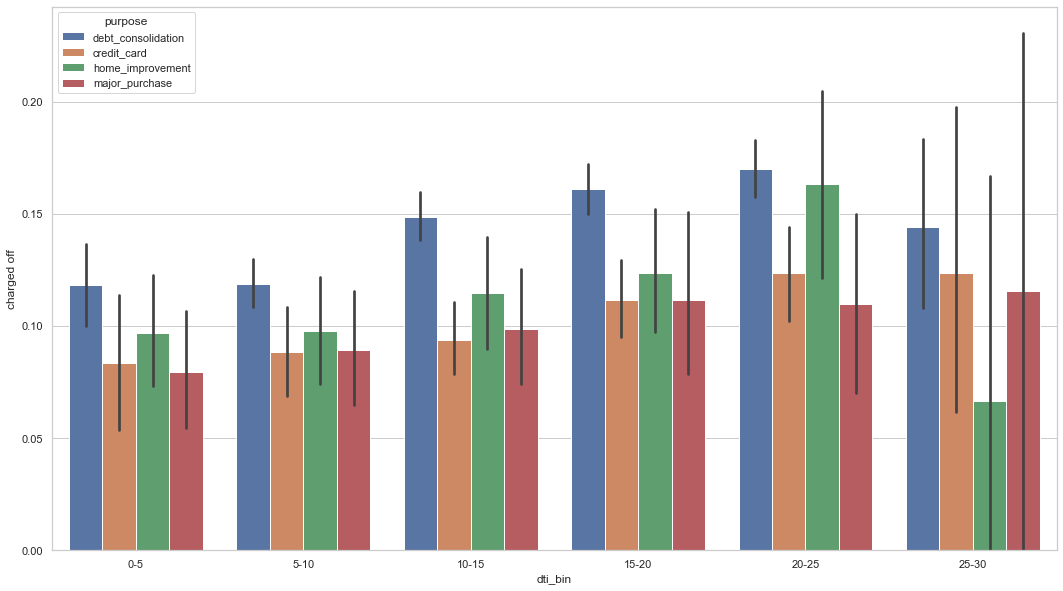

In [148]:
plt.figure(figsize=(18,10))
categorical_segmented_plot('dti_bin',df)
plt.show()

#### variable - annual_inc_bin - this is a derived variable from annual_inc

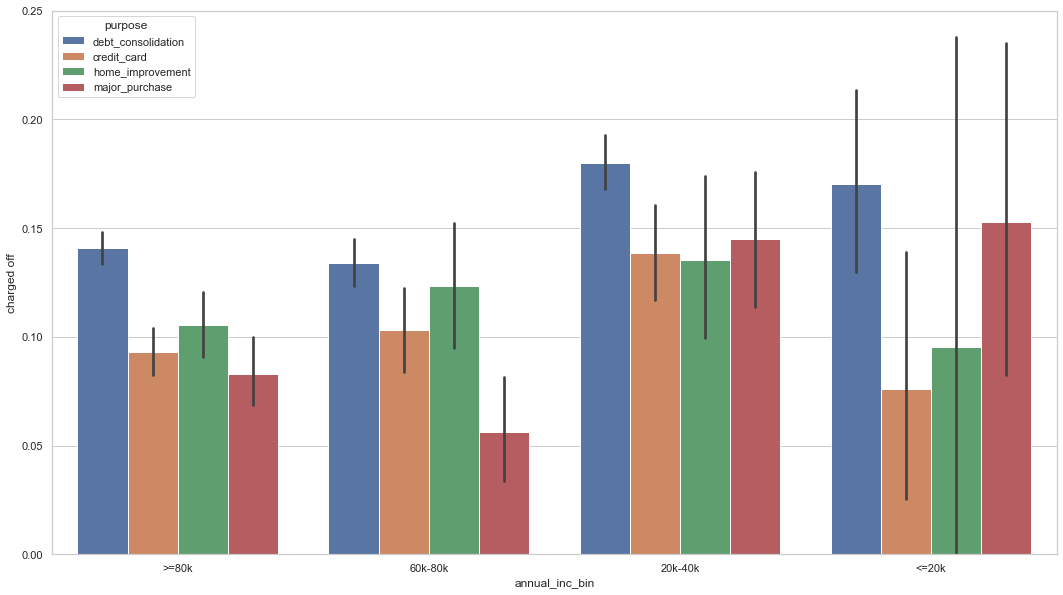

In [149]:
plt.figure(figsize=(18,10))
categorical_segmented_plot('annual_inc_bin',df)
plt.show()

## 04.03 -  Bivariate Analysis - Continuous variable

In [150]:
## Let's have a look at the correlation between the loan amount and other numerical variables
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_amnt', 'issue_d_year',
       'pub_rec_bankruptcies']
corr = df_loan[cont_var].corr()
corr

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,issue_d_year,pub_rec_bankruptcies
loan_amnt,1.000000,0.299997,0.930743,0.144488,0.258984,0.063093,-0.035290,0.174265,-0.046942,0.319781,0.067081,0.255773,0.477646,0.116198,-0.030431
int_rate,0.299997,1.000000,0.276320,-0.000605,0.047350,0.110755,0.158692,0.009638,0.099433,0.099042,0.467523,-0.044983,0.178142,0.026702,0.083455
installment,0.930743,0.276320,1.000000,0.118230,0.256466,0.054172,-0.023821,0.170789,-0.042820,0.316644,0.098722,0.230292,0.414844,0.062250,-0.028599
emp_length,0.144488,-0.000605,0.118230,1.000000,0.109105,0.046006,0.014399,0.098864,0.066426,0.154135,0.008763,0.211578,0.079293,0.094486,0.064073
annual_inc,0.258984,0.047350,0.256466,0.109105,1.000000,-0.120855,0.022572,0.155109,-0.013804,0.272345,0.018257,0.234626,0.138666,0.014550,-0.010939
dti,0.063093,0.110755,0.054172,0.046006,-0.120855,1.000000,-0.035735,0.290406,-0.005923,0.228580,0.276914,0.227322,0.007842,0.078463,0.006334
delinq_2yrs,-0.035290,0.158692,-0.023821,0.014399,0.022572,-0.035735,1.000000,0.010865,0.011383,-0.055600,-0.043327,0.067271,-0.012466,0.004072,0.005524
open_acc,0.174265,0.009638,0.170789,0.098864,0.155109,0.290406,0.010865,1.000000,0.003981,0.285306,-0.086977,0.684535,0.082496,0.014718,0.010268
pub_rec,-0.046942,0.099433,-0.042820,0.066426,-0.013804,-0.005923,0.011383,0.003981,1.000000,-0.058614,0.057348,-0.019498,-0.032012,-0.017007,0.839795
revol_bal,0.319781,0.099042,0.316644,0.154135,0.272345,0.228580,-0.055600,0.285306,-0.058614,1.000000,0.307275,0.310490,0.130723,-0.014204,-0.045836


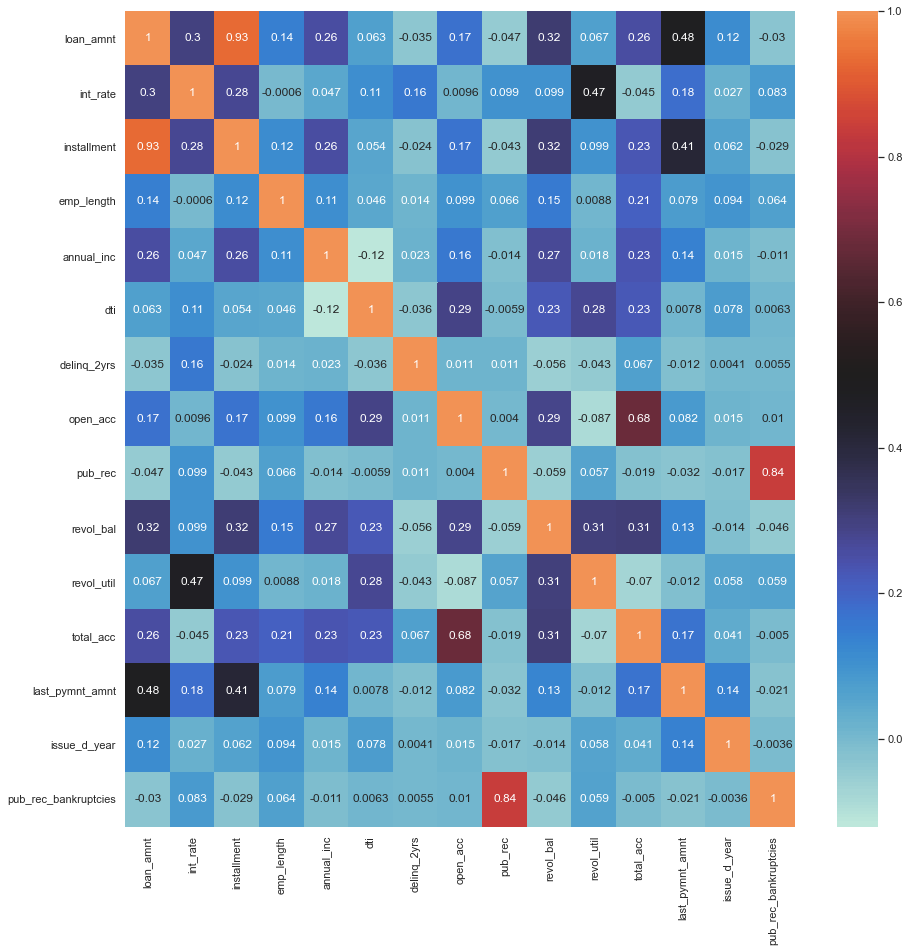

In [151]:
plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, center=0.5)
plt.show()

#### Observation - 
<p>
<ul>
    <li>
         Loan Amount is highly correlated (positive) with the installments , interest rates
    </li>
    <li>
        dti (Debt-to-Income Ratio) is high correlated (positive) to loan issue year and vice-versa.
    </li>
    <li>
        int_rate is negatively correlated to total_acc.
    </li>
    <li>
         pub_rec is high correlated (positive) to pub_rec_bankruptcies.
    </li>
</ul>
</p>

## Conclusion:


**Major variables to consider for loan prediction:**

    1. Loan Purpose
    2. Employment Length
    3. Interest Rate
    4. Annual Income
    5. Grade & Sub-grade
    6. Term